## Capstone Project
### An analysis of Height and Weight of 18 year olds

## 1.BUSINESS UNDERSTANDING


#### OBJECTIVES
 1.To determine if their is a relationship between height and weight

 2.To  understand the distribution of people based on their BMI/Weight

 3.To determine if the Height affects the BMI of a person

 
#### RESEARCH QUESTIONS
 1.Is there are relationship betweeen the height and weight ?

 2.How are individuals distributed according to their weight?

 3.Does the height of an individual affect their BMI?

## 2.DATA UNDERSTANDING
Our dataframe  contains only the height (inches) and weights (pounds) of 25,000 different humans of 18 years of age.It was collected from http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html



In [202]:
# Importing various libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [203]:
#Loading out data
df=pd.read_csv('SOCR-HeightWeight.csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [205]:
# describing our data
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


## 3.DATA PREPARATION

In [206]:
## checking for missing values
df.isna().sum()

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64

Our data does not contain any missing values

In [207]:
# checking for duplicates
df.duplicated().sum()

0

In [208]:
## dropping the index 
"""The index column will be dropped because we are not using it, we will use the default pandas column"""
df.drop(axis=1,columns='Index',inplace=True)

Our data does not any duplicates

In [209]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


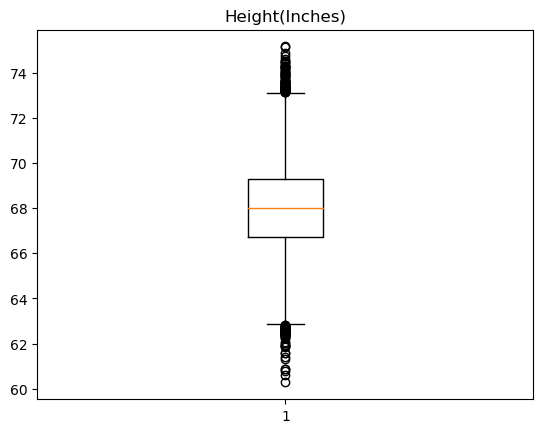

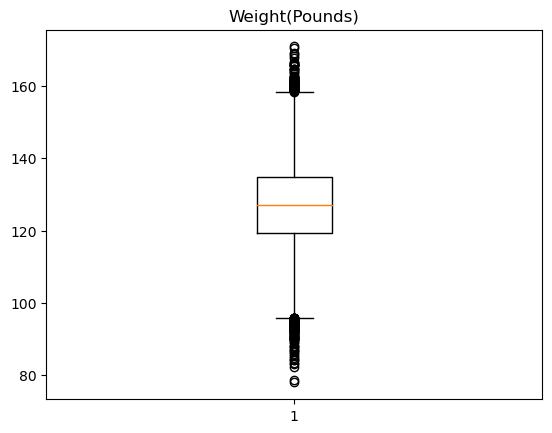

In [210]:
#Checking for outliers
for col in ['Height(Inches)', 'Weight(Pounds)']:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

As we can see from the both  height and weight box plot our data contains a large number of outliers ,I decided not to drop these  outliers because in cases of height and weight variables there may be extremes in real cases hence dropping our outliers might affect our analyses /model in cases of extremes 

Feature Engineering

In [211]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [212]:
# copy our dataframe so that we can use it in data wrangling and feature engineering
df1=df.copy()

In [213]:
df1

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


In [214]:
"""Creating two new columns that it is Height in meters and Weight in Kgs that will help us get the BMI"""
# Transforming the Weight in Kgs
df1['Weight(Kgs)']=df1['Weight(Pounds)']*0.453
# Transforming the Height in Metres
df1['HeightMts']=df1['Height(Inches)']*0.0254


df1.head()

,Height(Inches),Weight(Pounds),Weight(Kgs),HeightMts
0,65.78331,112.9925,51.185603,1.670896
1,71.51521,136.4873,61.828747,1.816486
2,69.39874,153.0269,69.321186,1.762728
3,68.21660,142.3354,64.477936,1.732702
4,67.78781,144.2971,65.366586,1.721810


In [215]:
#Calculating the BMI
df1['BMI']=df1['Weight(Kgs)']/df1['HeightMts']**2

df1.head()

,Height(Inches),Weight(Pounds),Weight(Kgs),HeightMts,BMI
0,65.78331,112.9925,51.185603,1.670896,18.333650
1,71.51521,136.4873,61.828747,1.816486,18.738127
2,69.39874,153.0269,69.321186,1.762728,22.309785
3,68.21660,142.3354,64.477936,1.732702,21.476502
4,67.78781,144.2971,65.366586,1.721810,22.048810


In [216]:
# Creating categories using the BMI column
def get_bmi(BMI):
    """This is a function that groups our BMi into different weight"""
    if BMI < 18.5:
        return 'Underweight'
    elif BMI >=18.5 and BMI <= 24.9:
        return 'Normalweight'
    elif BMI >= 25 and BMI <= 29.9:
        return  'OverWeight'
    else:
        return 'Obese'

In [217]:
def get_height(HeightMts):
    """This is a function that groups our BMi into different weight categories"""
    if HeightMts < 1.7:
        return 'Short'
    elif HeightMts >=1.7 and HeightMts <= 1.8:
        return 'Medium'
    else:
        return 'Tall'

In [218]:
df1['BMI_rang']=df1['BMI'].apply(get_bmi)
df1['Length']=df1['HeightMts'].apply(get_height)

In [219]:
df1.head()

,Height(Inches),Weight(Pounds),Weight(Kgs),HeightMts,BMI,BMI_rang,Length
0,65.78331,112.9925,51.185603,1.670896,18.333650,Underweight,Short
1,71.51521,136.4873,61.828747,1.816486,18.738127,Normalweight,Tall
2,69.39874,153.0269,69.321186,1.762728,22.309785,Normalweight,Medium
3,68.21660,142.3354,64.477936,1.732702,21.476502,Normalweight,Medium
4,67.78781,144.2971,65.366586,1.721810,22.048810,Normalweight,Medium


## Exploratory Data Analysis
EDA will be conducted in order to understand our dataframe,get characteristics through use of data visualization techniques

## Univariate Analysis
Here Individual columns will be  analysed in order to get patterns and trends

### BMI Range Count Plot

<AxesSubplot: xlabel='BMI_rang', ylabel='count'>

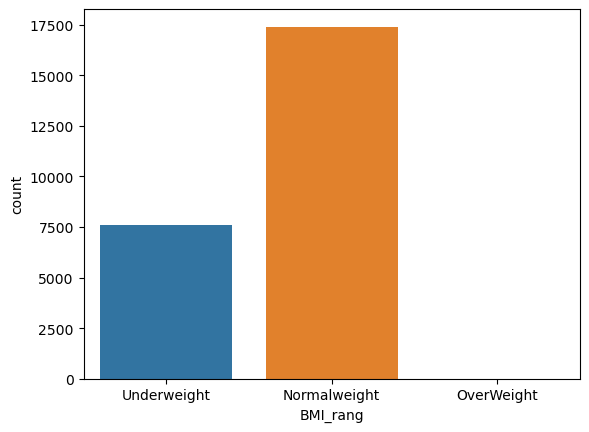

In [220]:
sns.countplot(data=df1, x="BMI_rang")

Most the people have a normal Weight,while a few are Under Weight and there are no obese people

### Height Count Plot

<AxesSubplot: xlabel='Length', ylabel='count'>

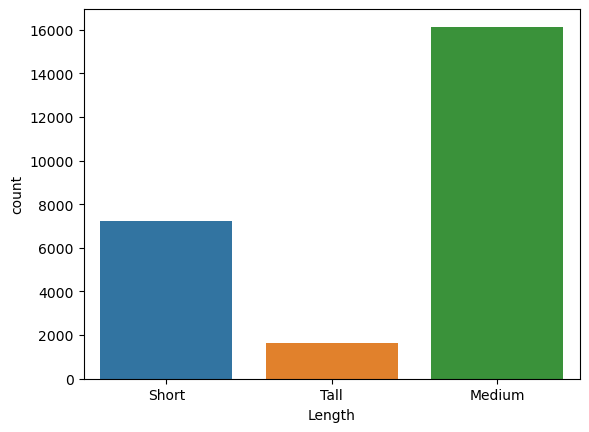

In [221]:
sns.countplot(data=df1, x="Length")

We can see medium height persons are the most common in our data while we have few numbers of short and Tall persons

### Weight Distirbution

<AxesSubplot: xlabel='Weight(Pounds)', ylabel='Density'>

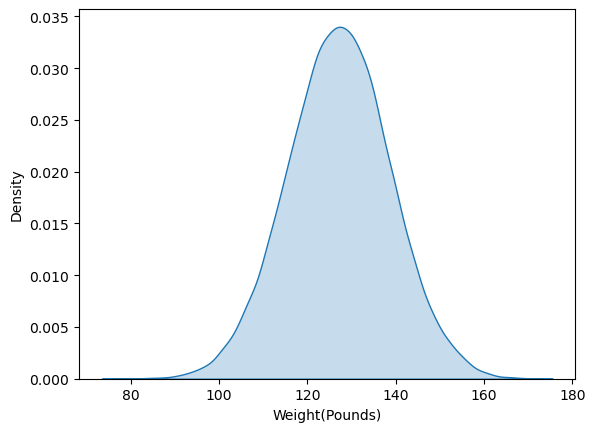

In [222]:
sns.kdeplot(data=df,x='Weight(Pounds)',fill=True)

###  Height Distribution

<AxesSubplot: xlabel='Height(Inches)', ylabel='Density'>

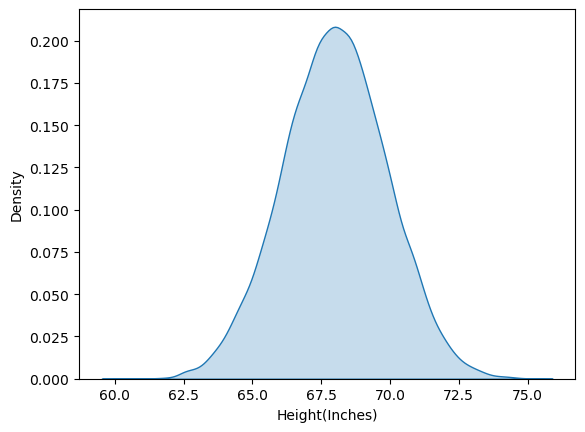

In [223]:
sns.kdeplot(data=df,x="Height(Inches)",fill=True)

We can see that both height and weight follow a normal distribution hence it will be easier to conduct statistical analysis
because they are statistically significant

### BIVARIATE ANALYSIS
An analysis will be conducted on two columns/variables to understand their relationships and patterns

In [224]:
def get_biv(col1,col2,data):
    plt.figure(figsize=(16,8))
    sns.countplot(x =col1, hue = col2, data = data)
    plt.title(f'Relationship between {col1} and {col2}')
    # Show the plot
    plt.show()

### Relationship between Length and BMI_range

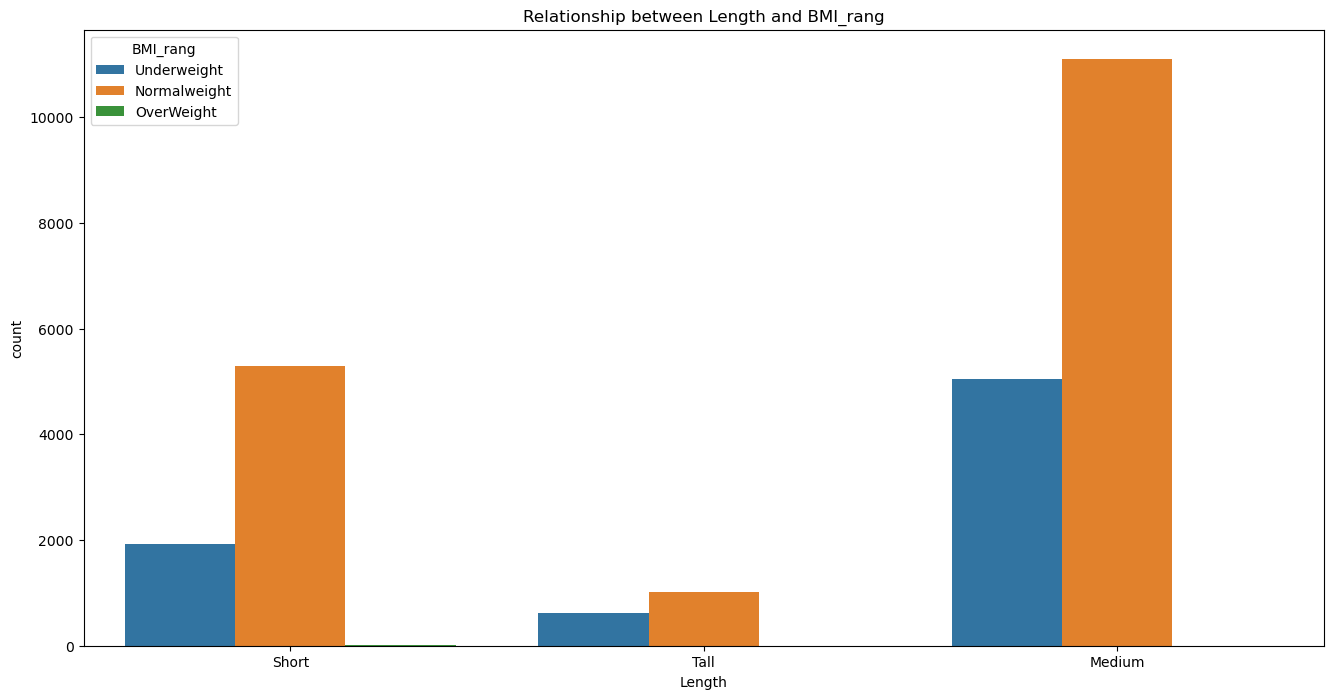

In [225]:
get_biv('Length','BMI_rang',df1)

We can see the most people in our data  have normal weight and a medium height,

### Relationship between Height and Weight

In [226]:
# calculating the correlation
corr = df.corr()
corr

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


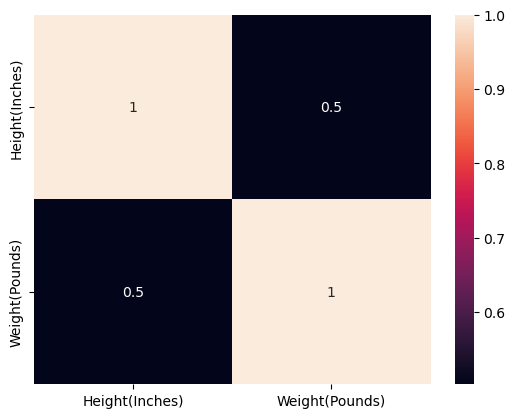

In [227]:
sns.heatmap(corr, annot=True)
plt.show()

### Relationship between Height and Weight

Text(0.5, 1.0, 'Relationship between height and Weight')

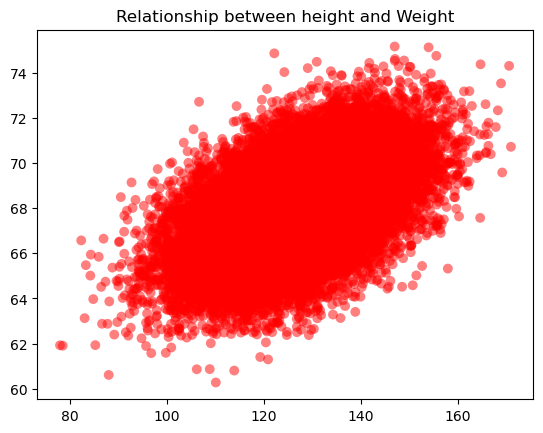

In [228]:
x=df1['Weight(Pounds)']
y=df1['Height(Inches)']
plt.scatter(x, y, s=50, c='r', alpha=0.5, edgecolors='none')
plt.title('Relationship between height and Weight')

We can see that there is a  moderate positive relationship of 0.5 between height and weight,as height increases weight increases

### Relationship between Height and Weight

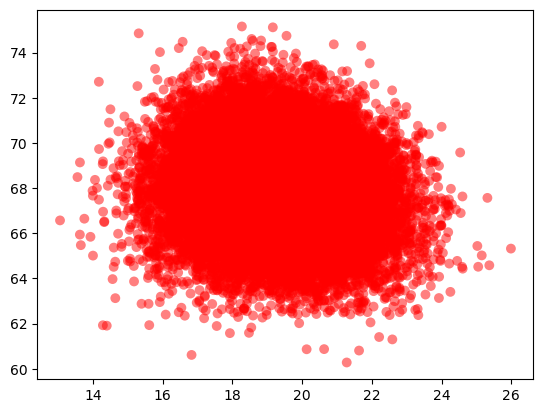

In [229]:
x=df1['BMI']
y=df1['Height(Inches)']
plt.scatter(x, y, s=50, c='r', alpha=0.5, edgecolors='none')

We can see that there is no clear relationship between the height and BMI

## STATISTICAL ANALYSIS

Getting the mode,mean,median and standard deviation of our dataframe.

I will use the original df ,the copied df1 enabled us to conduct only data wrangling and data visualizations

### Measures of Central Tendency

####  Median

In [230]:
median = df.median(skipna=True)
median

Height(Inches)     67.99570
Weight(Pounds)    127.15775
dtype: float64

Specifically, a median height of 67.99570 inches means that 50% of individuals in the population have a height equal to or less than 67.99570 inches, and 50% have a height equal to or greater than 67.99570 inches. Similarly, a median weight of 127.15775 pounds means that 50% of individuals in the population have a weight equal to or less than 127.15775 pounds, and 50% have a weight equal to or greater than 127.15775 pounds.

#### Mean

In [231]:
mean = df.mean()
mean

Height(Inches)     67.993114
Weight(Pounds)    127.079421
dtype: float64

 The average height of individuals in the population is approximately 67.99 inches. Similarly,  the average weight of individuals in the population is approximately 127.08 pounds.

#### Standard Deviation

In [232]:
std = df.std(skipna=True)
std

Height(Inches)     1.901679
Weight(Pounds)    11.660898
dtype: float64

The heights of individuals in the population vary by an average of approximately 1.90 inches from the mean height. Similarly,  the weights of individuals in the population vary by an average of approximately 11.66 pounds from the mean weight.

In [233]:
mean = df.mean()
mean

Height(Inches)     67.993114
Weight(Pounds)    127.079421
dtype: float64

### Hypothesis Testing

### 1.Is there a relationship between Height and Weight
AS we have seen in the correlation above,there is a positive relationship between height and Weight.We will conduct an hypothesis in order to determine  the "significance of the correlation coefficient" to decide whether the linear relationship in the sample data is strong enough to use to model the relationship in the population.

#### i.Formulating the null and alternate hypothesis 
~ Null Hypothesis:  H0:ρ=0  There IS NOT a significant linear relationship(correlation) between  x and  y in the population.
 
 ~Alternate Hypothesis:  Ha:ρ≠0 There IS a significant linear relationship(correlation) between  x and  y in the population

In [234]:
import scipy.stats as stats

# Calculate the correlation coefficient and p-value
corr_coeff, p_value = stats.pearsonr(df['Height(Inches)'], df['Weight(Pounds)'])

# Print the correlation coefficient and p-value
print("Correlation Coefficient:", corr_coeff)
print("p-value:", p_value)

# Set the significance level
alpha = 0.05

# Compare the p-value to the significance level to determine statistical significance
if p_value < alpha:
    print("Reject null hypothesis - there is a significant correlation between the variables")
else:
    print("Fail to reject null hypothesis - there is no significant correlation between the variables")


Correlation Coefficient: 0.502858520602844
p-value: 0.0
Reject null hypothesis - there is a significant correlation between the variables


Hence we will reject the null hypothesis because the P-value is less than  the alpha value,hence we can conclude that there is a significant  correlation between the height and Weight

### 2.Does the Height affect BMI ?
#### i.Formulating the null and alternate hypothesis 
~ Null Hypothesis:  H0:ρ=0  The Height does not affect one's BMI .
 
 ~Alternate Hypothesis:  Ha:ρ≠0 The Height affects one's BMI

In [235]:
import scipy.stats as stats

# Calculate the correlation coefficient and p-value
corr_coeff, p_value = stats.pearsonr(df1['Height(Inches)'], df1['BMI'])

# Print the correlation coefficient and p-value
print("Test Report:\n")

print("Correlation Coefficient:", corr_coeff)
print("p-value:", p_value)

# Set the significance level
alpha = 0.05

# Compare the p-value to the significance level to determine statistical significance
if p_value < alpha:
    print("Reject null hypothesis and conclude that Height has an effect on BMI")
else:
    print("Fail to reject null hypothesis and conclude that  Height has no effect on BMI")

Test Report:

Correlation Coefficient: -0.12151881486242395
p-value: 7.26945946653845e-83
Reject null hypothesis and conclude that Height has an effect on BMI


Hence we will reject the null hypothesis because the P-value is less than  the alpha value,hence we can conclude that there is a significant  correlation between the height and BMI and hence Height affects the BMi

## FINDINGS

1.We can see that their is a clear relationship between Height and Weight,we can see that as the Height of an individual increases the Weight tends to Increase

2.Most people in our population have a normal weight ,with a few underweight individuals

3.We have concluded that an Height of an Individual affects the BMI.